In [1]:
# Input info
se_cells_meta_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/fate_corr/minC5_corr.Kendall.b_group_inputOnly/shuffle"
min_cell = 5
cluster_min_cell = 50
to_group = True
use_input = True


# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/se_cells_meta_labels.tsv" 
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/fate_correlation/minC5_corr.Kendall.b"

# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
# outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_prefilterMerge_impute/knn/kparam_30/gff_A2_black/annotation_clones/fate_correlation/scrap2/minC5_corr.Kendall.b/"
# use_input = False
# min_cell = 5

input_col = "Input"
corr_method = "kendall_b"
to_rm_zero = False
pseudocount = 1



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np
from mplh.fig_utils import helper_save as hs

fig_utils from mplh


In [3]:
sns.set(font_scale = 1.3)


In [143]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

def get_clone_count(x, clone_counts):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]


#norm_corr_df = clone_norm_df.drop(["ncells", "donor"],axis=1).corr(method="spearman")
#norm_corr_df, norm_pval_df = get_corr(clone_norm_df, corr_method)

In [17]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t', index_col=0)
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)
se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].astype(object).astype(str)



### Remove None before normalizing
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]

if to_group:
    se_cells_meta["nuclear_clusters"] = se_cells_meta["nuclear_clusters"].apply(lambda x: ''.join(i for i in x if not i.isdigit()))
    
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,Row.names,name,run,donor,condition,nuclear_clusters
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798.0,3956,111,95,1643,4740,15253,...,5,12.349834,8908,5567,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,cd34norm_1_13,cd34norm,cd34norm_1,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018.0,1524,60,45,585,5688,4116,...,5,10.591522,2356,1996,cd34norm_Flt3l_AAACGAAAGTACAACA-1,cd34norm_0_0,cd34norm,cd34norm_0,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690.0,3034,82,125,1680,24974,7795,...,1,11.667112,4275,3340,cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_2_4,cd34norm,cd34norm_2,Flt3l,HPSC
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381.0,1416,44,50,547,3616,3708,...,5,10.540128,2150,1864,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,cd34norm_2_2,cd34norm,cd34norm_2,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421.0,5698,112,157,1762,14034,8658,...,8,11.601771,5338,3881,cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_2_8,cd34norm,cd34norm_2,Flt3l,MkP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_b2_Input_TTTGTGTCATGGCCTG-1,Input,2009,2009,8747.0,1284,52,37,278,4416,2680,...,10,10.972980,1969,1714,CHIP_b2_Input_TTTGTGTCATGGCCTG-1,CHIP_b2_1_12,CHIP_b2,CHIP_b2_1,Input,HPSC
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,Input,6841,6841,35511.0,7946,148,118,1467,14501,11331,...,7,12.740202,8019,5370,CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,CHIP_b2_1_15,CHIP_b2,CHIP_b2_1,Input,HPSC
CHIP_b2_Input_TTTGTGTGTGGACAGT-1,Input,1877,1877,14217.0,2190,42,40,420,8229,3296,...,1,10.874981,1912,1659,CHIP_b2_Input_TTTGTGTGTGGACAGT-1,CHIP_b2_0_8,CHIP_b2,CHIP_b2_0,Input,HPSC
CHIP_b2_Input_TTTGTGTTCAGTACAC-1,Input,3000,3000,15165.0,2707,67,52,475,7195,4669,...,1,11.551228,3143,2556,CHIP_b2_Input_TTTGTGTTCAGTACAC-1,CHIP_b2_1_23,CHIP_b2,CHIP_b2_1,Input,HPSC


In [7]:
palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}



In [8]:
clone_counts = (se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size()+pseudocount).reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)

def convert_log2(df):
    log2_df = df.copy()
    log2_df[hue_order] = np.log2(1+log2_df[hue_order])
    return log2_df
     


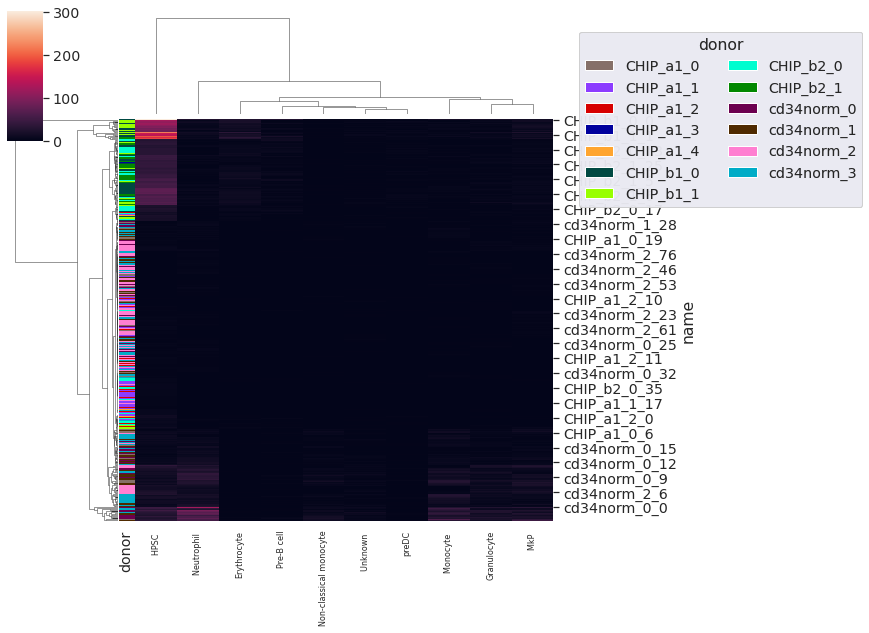

In [9]:
from mplh import cluster_help as ch
ch.plot_cluster(clone_counts_df.drop(["ncells", "donor"], axis=1), row_meta=clone_counts_df[["donor"]])


### Data filtering clones greater than min_ncell and cluster > cluster_min_ncell

In [10]:
def keep_top_cluster(df, cluster_min_cell):
    cols_to_keep = df.drop(["ncells","donor"], axis=1).sum() > cluster_min_cell
    return df[["ncells","donor"] + list(cols_to_keep[cols_to_keep].index.values)]



In [11]:
filt_clone_counts_df = convert_log2(keep_top_cluster(keep_top_clones(clone_counts_df, min_cell=min_cell), cluster_min_cell))
filt_clone_counts_df

,ncells,donor,Erythrocyte,Granulocyte,HPSC,MkP,Monocyte,Neutrophil,Non-classical monocyte,Pre-B cell,Unknown,preDC
name,,,,,,,,,,,,
CHIP_b1_0_0,438,CHIP_b1_0,4.754888,4.169925,8.243174,4.000000,4.247928,4.700440,2.000000,4.754888,0.000000,2.807355
CHIP_b1_1_0,327,CHIP_b1_1,5.129283,3.906891,7.781360,4.643856,2.321928,3.807355,1.584963,2.584963,2.584963,3.000000
CHIP_b1_0_1,277,CHIP_b1_0,4.392317,2.584963,7.607330,3.807355,3.321928,3.169925,0.000000,4.321928,1.584963,3.000000
cd34norm_0_0,272,cd34norm_0,0.000000,4.754888,5.584963,5.044394,4.754888,6.942515,3.169925,0.000000,3.321928,1.584963
CHIP_b2_1_26,256,CHIP_b2_1,4.754888,2.321928,7.507795,4.169925,2.000000,3.321928,0.000000,3.584963,1.584963,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_a1_1_9,6,CHIP_a1_1,1.584963,0.000000,2.321928,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cd34norm_2_62,6,cd34norm_2,0.000000,1.584963,1.584963,0.000000,0.000000,1.584963,0.000000,0.000000,0.000000,0.000000
cd34norm_3_47,6,cd34norm_3,0.000000,0.000000,0.000000,1.584963,0.000000,2.321928,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'log2')

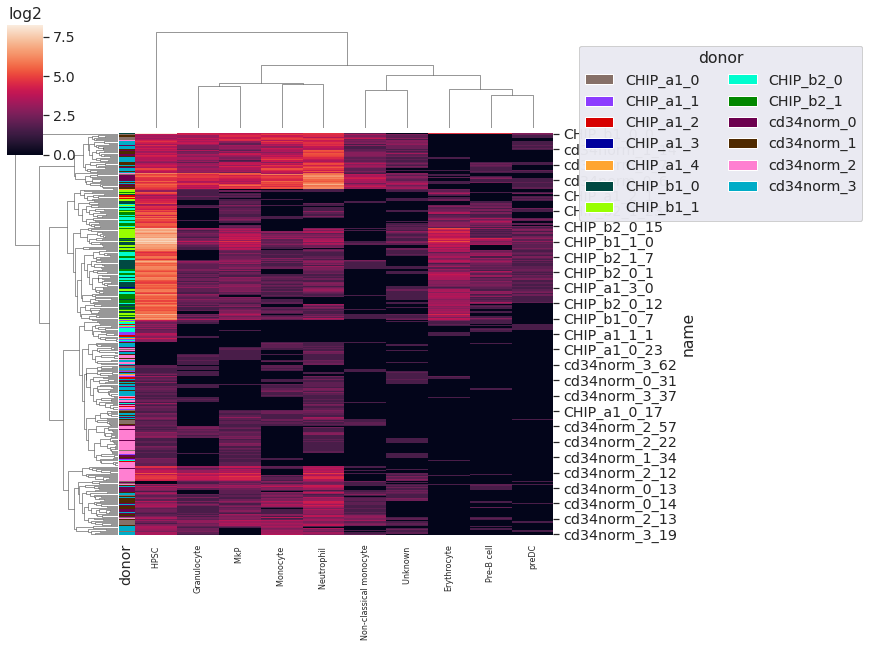

In [12]:
g = ch.plot_cluster(filt_clone_counts_df.drop(["ncells", "donor"], axis=1), 
                row_meta=filt_clone_counts_df[["donor"]])
g.ax_cbar.set_title("log2")

Text(0.5, 1.0, 'log2')

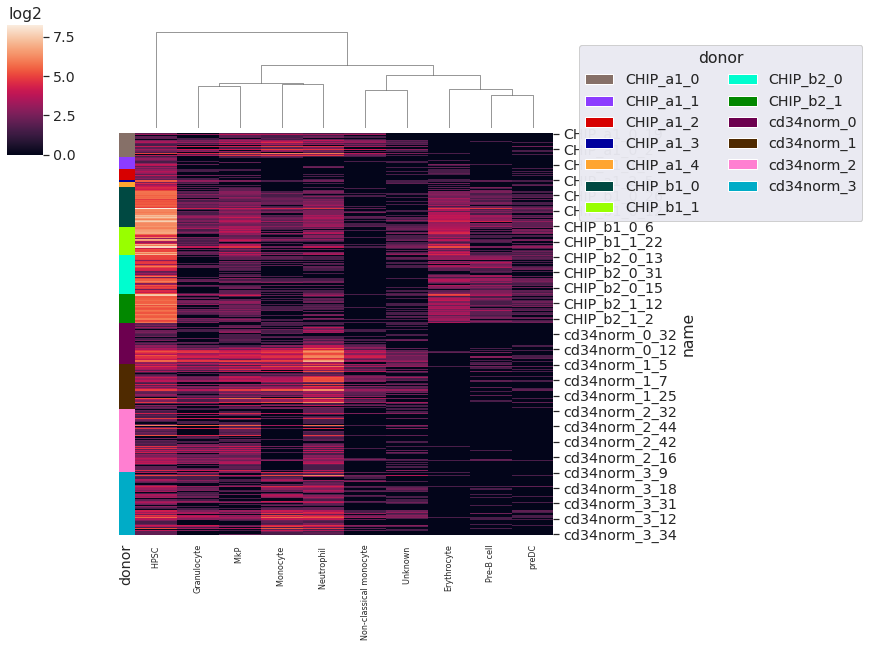

In [130]:
g = ch.plot_cluster(filt_clone_counts_df.sort_values("donor").drop(["ncells", "donor"], axis=1), 
                    to_row_clust=False,
                row_meta=filt_clone_counts_df[["donor"]])
plt.savefig(join(outdir, "input_counts_log2.pdf"))
g.ax_cbar.set_title("log2")

## Remove clusters with less than 10 cells (or clones?)

## Fate correlation

In [13]:
from scipy.stats import kendalltau, spearmanr

def kendalltau_b(x,y, met='corr'):
    if met == 'corr':
        return kendalltau(x, y, variant='b')[0]
    elif met == "pval":
        return kendalltau(x, y, variant='b')[1]
    
def filt_zero(x, y):
    if to_rm_zero:
        keep_inds = np.where((x!=0) & (y!=0))
        return x[keep_inds], y[keep_inds]
    return (x,y)

def get_corr(df, corr_method):
    df = df.copy().drop(["ncells", "donor"],axis=1, errors='ignore')
    if corr_method == "spearman":
        corr_df = df.corr(method=lambda x, y: spearmanr(*filt_zero(x, y))[0]).fillna(0) 
        pval_df = df.corr(method=lambda x, y: spearmanr(*filt_zero(x, y))[1]) - (np.eye(len(corr_df)))
    elif corr_method == "kendall_b":
        corr_df = df.corr(method=lambda x, y: kendalltau(*filt_zero(x, y), variant='b')[0]).fillna(0)
        pval_df = df.corr(method=lambda x, y: kendalltau(*filt_zero(x, y), variant='b')[1]) - (np.eye(len(corr_df)))
    return corr_df, pval_df

def get_flat_corr(corr_df):
    return pd.DataFrame(corr_df.mask(np.triu(np.ones(corr_df.shape)).astype(bool)).stack(),
                                columns=["r"]).reset_index().rename({"level_0": "A", "level_1": "B"}, axis=1)



In [14]:
all_corr_df, all_pval_df = get_corr(filt_clone_counts_df, corr_method)
all_flat_corr_df =  get_flat_corr(all_corr_df)
all_flat_corr_df


,A,B,r
0,Granulocyte,Erythrocyte,0.085716
1,HPSC,Erythrocyte,0.650595
2,HPSC,Granulocyte,0.328254
3,MkP,Erythrocyte,0.191996
4,MkP,Granulocyte,0.516083
5,MkP,HPSC,0.400463
6,Monocyte,Erythrocyte,-0.033190
7,Monocyte,Granulocyte,0.468295
8,Monocyte,HPSC,0.194578
9,Monocyte,MkP,0.404360


## Shuffle

### First get the cells from clones and clusters

In [22]:
cells_meta = se_cells_meta.loc[(se_cells_meta["name"].isin(filt_clone_counts_df.index.values)) & 
                               se_cells_meta["nuclear_clusters"].isin(filt_clone_counts_df.columns.values)]
cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_ATAC_log2,nCount_RNA,nFeature_RNA,Row.names,name,run,donor,condition,nuclear_clusters
cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,Flt3l,5219,5219,25798.0,3956,111,95,1643,4740,15253,...,5,12.349834,8908,5567,cd34norm_Flt3l_AAACGAAAGAGCTCCC-1,cd34norm_1_13,cd34norm,cd34norm_1,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAAAGTACAACA-1,Flt3l,1542,1542,12018.0,1524,60,45,585,5688,4116,...,5,10.591522,2356,1996,cd34norm_Flt3l_AAACGAAAGTACAACA-1,cd34norm_0_0,cd34norm,cd34norm_0,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAACAACGTACT-1,Flt3l,3251,3251,37690.0,3034,82,125,1680,24974,7795,...,1,11.667112,4275,3340,cd34norm_Flt3l_AAACGAACAACGTACT-1,cd34norm_2_4,cd34norm,cd34norm_2,Flt3l,HPSC
cd34norm_Flt3l_AAACGAACAAGCGGTA-1,Flt3l,1488,1488,9381.0,1416,44,50,547,3616,3708,...,5,10.540128,2150,1864,cd34norm_Flt3l_AAACGAACAAGCGGTA-1,cd34norm_2_2,cd34norm,cd34norm_2,Flt3l,Neutrophil
cd34norm_Flt3l_AAACGAACACCTGGTG-1,Flt3l,3107,3107,30421.0,5698,112,157,1762,14034,8658,...,8,11.601771,5338,3881,cd34norm_Flt3l_AAACGAACACCTGGTG-1,cd34norm_2_8,cd34norm,cd34norm_2,Flt3l,MkP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHIP_b2_Input_TTTGTGTCATGGCCTG-1,Input,2009,2009,8747.0,1284,52,37,278,4416,2680,...,10,10.972980,1969,1714,CHIP_b2_Input_TTTGTGTCATGGCCTG-1,CHIP_b2_1_12,CHIP_b2,CHIP_b2_1,Input,HPSC
CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,Input,6841,6841,35511.0,7946,148,118,1467,14501,11331,...,7,12.740202,8019,5370,CHIP_b2_Input_TTTGTGTGTGGAAAGA-1,CHIP_b2_1_15,CHIP_b2,CHIP_b2_1,Input,HPSC
CHIP_b2_Input_TTTGTGTGTGGACAGT-1,Input,1877,1877,14217.0,2190,42,40,420,8229,3296,...,1,10.874981,1912,1659,CHIP_b2_Input_TTTGTGTGTGGACAGT-1,CHIP_b2_0_8,CHIP_b2,CHIP_b2_0,Input,HPSC
CHIP_b2_Input_TTTGTGTTCAGTACAC-1,Input,3000,3000,15165.0,2707,67,52,475,7195,4669,...,1,11.551228,3143,2556,CHIP_b2_Input_TTTGTGTTCAGTACAC-1,CHIP_b2_1_23,CHIP_b2,CHIP_b2_1,Input,HPSC


In [ ]:
#filt_clone_counts_df = convert_log2(keep_top_cluster(keep_top_clones(clone_counts_df, min_cell=min_cell), cluster_min_cell))

In [160]:
def shuffle_nuclear(df):
    df["nuclear_clusters"] = df.sample(frac=1.0)["nuclear_clusters"].values
    return df


def create_counts(cells_meta):
    clone_counts = (cells_meta.groupby(["name", "nuclear_clusters","donor"]).size()+pseudocount).reset_index().rename({0:"ncells"}, axis=1)
    clone_counts = clone_counts[~(clone_counts["name"]=="None")]
    clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
    clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1, args=(clone_counts,))),axis=1).fillna(0)
    filt_clone_counts_df = convert_log2(keep_top_cluster(keep_top_clones(clone_counts_df, min_cell=min_cell), cluster_min_cell))
    return filt_clone_counts_df


def normalize_in_clone(clone_counts):
    clone_norm = clone_counts.drop(["donor", "ncells"], axis=1).copy()
    clone_norm = clone_norm/clone_norm.sum()
    clone_norm = pd.merge(clone_counts[["donor", "ncells"]], clone_norm, left_index=True, right_index=True )
    #clone_norm["ncells"] = np.log2(1+clone_norm["ncells"])
    #print(clone_norm.head())
    return clone_norm
    #clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1, args=(clone_norm,))),axis=1).fillna(0)
    #return clone_norm_df


def wrap_shuffle_corr(nsim, cells_meta, cols_group="donor"):
    all_out = []
    for n, _ in nsim.iterrows():
        sim_cells = cells_meta.copy()
        if cols_group is not None:
            sim_cells = sim_cells.groupby("donor").apply(shuffle_nuclear)
        else:
            sim_cells = shuffle_nuclear(sim_cells)
        clone_counts = create_counts(sim_cells)
        clone_counts = normalize_in_clone(clone_counts)
        all_corr_df, all_pval_df = get_corr(clone_counts, corr_method)
        all_flat_corr_df =  get_flat_corr(all_corr_df)
        all_flat_corr_df["nsim"] = n
        all_out.append(all_flat_corr_df)
    return pd.concat(all_out) #np.array(all_out)

In [111]:
from src.utils.parallel_helper import parallel_ar as parar
from src.utils.parallel_helper import parallel_df as pardf

In [106]:
cells_meta = cells_meta[~(cells_meta["name"] == "None")]

In [161]:
n_cpus = 24
n_shuffle = 10000
sim_out = pardf(pd.DataFrame(np.arange(n_shuffle)).rename({0:"nsim"},axis=1), func=wrap_shuffle_corr,
                func_args=(cells_meta, "donor"),num_processes=n_cpus)
sim_out


,A,B,r,nsim
0,Granulocyte,Erythrocyte,0.057541,0
1,HPSC,Erythrocyte,0.650779,0
2,HPSC,Granulocyte,0.336366,0
3,MkP,Erythrocyte,0.166305,0
4,MkP,Granulocyte,0.522959,0
...,...,...,...,...
40,preDC,Monocyte,0.095074,9999
41,preDC,Neutrophil,0.094127,9999
42,preDC,Non-classical monocyte,0.032600,9999
43,preDC,Pre-B cell,0.479619,9999


,A,B,r
1,HPSC,Erythrocyte,0.635673
14,Neutrophil,Monocyte,0.589140
21,Pre-B cell,Erythrocyte,0.585209


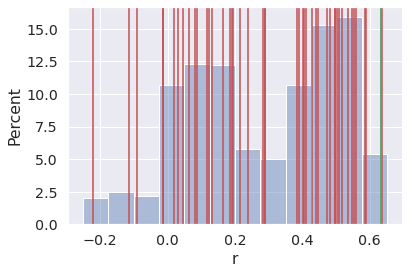

In [217]:
sim_out

In [261]:
all_flat_corr_df["pval"] = all_flat_corr_df["r"].apply(lambda x: 1-((x>sim_out["r"]).sum()/sim_out.shape[0]))


,A,B,r,pval
0,Granulocyte,Erythrocyte,-0.012493,0.912747
1,HPSC,Erythrocyte,0.635673,0.009316
2,HPSC,Granulocyte,0.284843,0.523413
3,MkP,Erythrocyte,0.163374,0.649031
4,MkP,Granulocyte,0.497680,0.232356
5,MkP,HPSC,0.403405,0.421831
6,Monocyte,Erythrocyte,-0.089441,0.939804
7,Monocyte,Granulocyte,0.429204,0.359253
8,Monocyte,HPSC,0.192256,0.601351
9,Monocyte,MkP,0.410880,0.404089


## Save p-value results

In [264]:
outdir

'/data/Mito_Trace/output/aggregate/CHIP_aggr/v04/data/clone_var_init/variants.prefilterMerge_impute_knnRes.30/aggregate/annotation/fate_corr/minC5_corr.Kendall.b_group/shuffle'

In [265]:
all_flat_corr_df.sort_values("pval").to_csv(join(outdir, "correlation_with_pvals.csv"))

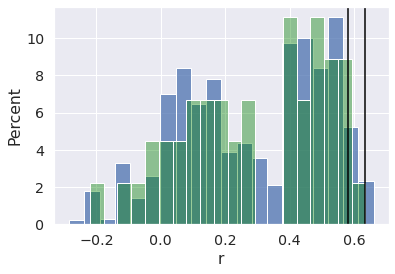

In [267]:

## Plot our values vs theres
p_thresh = 0.05
%matplotlib inline
f, ax = plt.subplots(nrows=1, ncols=1, squeeze=True)
sns.histplot(sim_out.reset_index()[["r"]], stat="percent", x='r', ax=ax, bins=20)
sns.histplot(all_flat_corr_df[["r"]], stat="percent", x='r', alpha=0.4, ax=ax, color='green', bins=20)

plt.axvline(p_01, color="black")
plt.axvline(p_05, color="black")
plt.savefig(join(outdir, "correlation.background.pdf"))

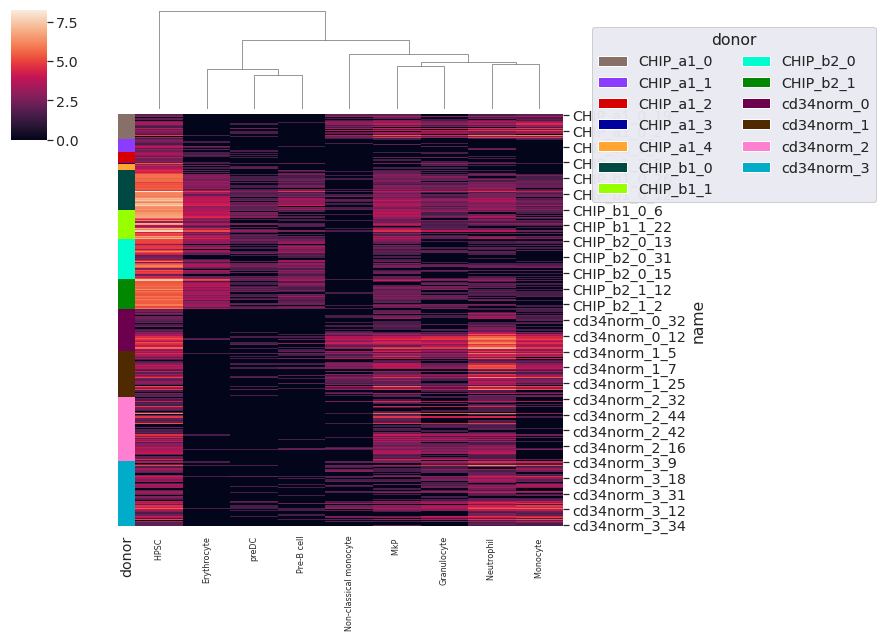

In [241]:
top_vals = all_flat_corr_df.loc[all_flat_corr_df["r"]>.5]
top_counts_df = filt_clone_counts_df[["donor"]+list(set(top_vals["A"].values).union(top_vals["B"]))]

g = ch.plot_cluster(top_counts_df.sort_values("donor").drop(["donor"], axis=1), 
                    to_row_clust=False,
                row_meta=top_counts_df[["donor"]])

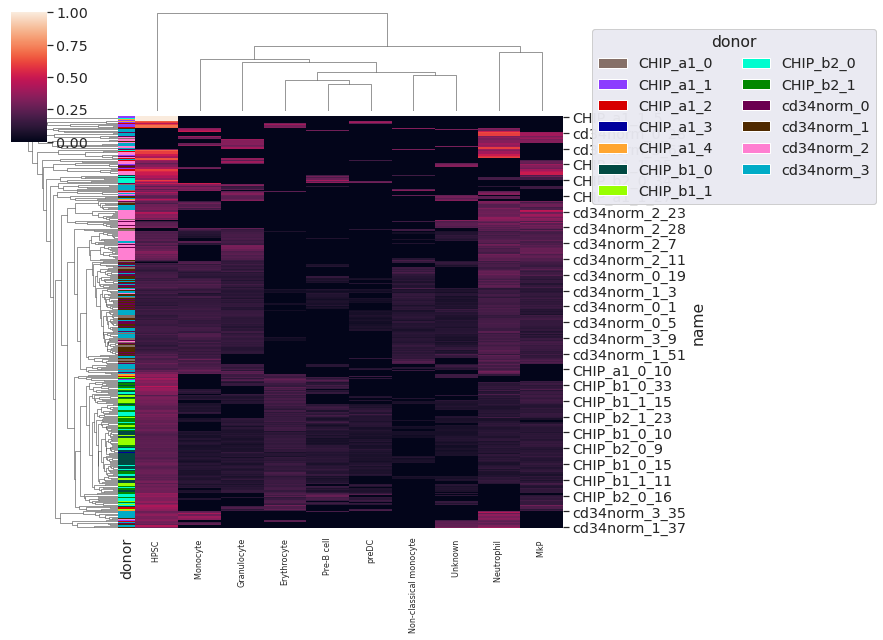

In [269]:
top_vals = all_flat_corr_df #.loc[all_flat_corr_df["r"]>.5]
top_counts_df = filt_clone_counts_df[list(set(top_vals["A"].values).union(top_vals["B"]))]
norm_top_counts_df = top_counts_df.divide(top_counts_df.sum(axis=1), axis='rows')

g = ch.plot_cluster(norm_top_counts_df, #norm_top_counts_df.sort_values("donor").drop(["donor"], axis=1), 
                    to_row_clust=True,
                    row_meta=filt_clone_counts_df[["donor"]])
plt.savefig(join(outdir, "ncells.clone.normed.pdf"))


## Calculate p-values for entire distribution

In [ ]:
#sns.histplot(sim_out["r"])
#sns.histplot(sim_out["r"])


In [11]:
# #if rm_zero:
# def filt_zero(df, rm_zero):
#     if rm_zero:
#         df.loc[df.drop(["donor", "ncells"], axis=1)]
#         return 
        
#     return df

# def get_corr_np(corr_df):
#     corr_np = corr_df.to_numpy()  
#     correlations = []

#     print('{} - Calculating Correlation'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
#     for col_1 in range(corr_np.shape[-1]):
#         for col_2 in range(corr_np.shape[-1]):
#             if col_2 > col_1: #to not calculate duplicates, eg. (A, G) (G, A)
#                 # to remove rows when both are 0, eg. (0, 0)
#                 numpy_col_1 = corr_np[~((corr_np[:,col_1]==.0) & (corr_np[:,col_2]==.0)),col_1]
#                 numpy_col_2 = corr_np[~((corr_np[:,col_1]==.0) & (corr_np[:,col_2]==.0)),col_2]
#                 cor = np.corrcoef(numpy_col_1, numpy_col_2)[-1,0]
#                 correlations.append(cor)


---

---

---